# Лабораторна робота 1. Оцінювання часу обчислень виразів

**Виконав:** студент 2 курсу бакалаврату кафедри комп'ютерної інженерії ***Постільняк Ярослав Володимирович***

**Дата виконання:** 8 вересня 2025 року

**Мета роботи:**
- отримати навички інтерактивної роботи з Python в онлайн-середовищі **Google Colab**;
- опанувати основні способи оцінювання часу обчислень виразів і порівняти їх роботу;
- проаналізувати швидкості обчислення математичних виразів різної часової складності, побудованих на основі списків і NumPy-масивів.

## Хід роботи

### Завдання 1

In [1]:
%time 2**10

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


18446744073709551616

In [2]:
%%time
2**10

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


18446744073709551616

### Завдання 2

In [1]:
n = 2**10
t = %timeit -o -r 5 -n 3 sum(range(n))

t.best
# Це з 5 циклами по 3 ітерації

24.3 µs ± 4.02 µs per loop (mean ± std. dev. of 5 runs, 3 loops each)


2.033399999845642e-05

In [2]:
%%timeit -r 5 -n 3
n = 2**10
sum(range(n))
# Це з 5 циклами по 3 ітерації

24.6 ms ± 2.39 ms per loop (mean ± std. dev. of 5 runs, 3 loops each)


In [3]:
%%timeit
n = 2**10
l = list(range(n))
sum(l)
# Це з значенням за-замовчуванням

38 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
n = 2**10
l = %time list(range(n))
sum(l)
#Також значення за замовчуванням

CPU times: user 40 µs, sys: 0 ns, total: 40 µs
Wall time: 44.1 µs


523776

###Завдання **3**

In [101]:
n = 2**10
l = %timeit -o -r7 sum(range(n))

l.best
print('Розраховані значення часу однократного обчислення виразу\n')
print(l.timings)

22.8 µs ± 4.46 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Розраховані значення часу однократного обчислення виразу

[2.0536721299977217e-05, 2.1131485010009783e-05, 3.3665717170006246e-05, 2.1283303599993814e-05, 2.138023384999542e-05, 2.0699327570000604e-05, 2.0598181419991306e-05]


###Завдання 4

| Вираз | Автооцінювання | %time | %%time | %timeit (мінімальний) | %%timeit (середній) |
| :---- | :------------: | ----: | -----: | --------------------: | -----------------: |
| 1     |    0,022с           |     0,0141 ms |      0,041 ms |     0,0001113 ms                 |                  0,000218 ms |
| 2     |        0,013 с      |     0,887 ms |      0,975 ms |                     0,866 ms |                  1.07 ms ± 0,275 ms |
| 3     |        0,016с       |     2,12 ms |      1,6 ms|1,582 ms |                     1.83 ms ± 0,403 ms |                  – |


In [102]:
math.sinh(math.pi/4)

0.8686709614860095

In [24]:
%time math.sinh(math.pi/4)

CPU times: user 11 µs, sys: 1e+03 ns, total: 12 µs
Wall time: 14.1 µs


0.8686709614860095

In [25]:
%%time
math.sinh(math.pi/4)

CPU times: user 38 µs, sys: 0 ns, total: 38 µs
Wall time: 41 µs


0.8686709614860095

In [28]:
r = %timeit -o -r 10 math.sinh(math.pi/4)
r.best

124 ns ± 23.6 ns per loop (mean ± std. dev. of 10 runs, 10000000 loops each)


1.1134061760003533e-07

In [29]:
%%timeit -r 10
math.sinh(math.pi/4)

218 ns ± 7.12 ns per loop (mean ± std. dev. of 10 runs, 1000000 loops each)


In [90]:
val = math.sinh(sum(random.random() for i in range(10000)) / 10000)

In [43]:
import random, math
val = %time math.sinh(sum(random.random() for i in range(10000)) / 10000) #генеруємо числа по одному і додаємо їх у спільну суму
print(val) #Потім ділимо на 10000, бо за формулою треба знайти середнє значення
#і все, потім ми беремо sinh

CPU times: user 882 µs, sys: 0 ns, total: 882 µs
Wall time: 887 µs
0.5194610799400117


In [44]:
%%time
val = math.sinh(sum(random.random() for i in range(10_000)) / 10_000)
print(val)

0.5179814079301204
CPU times: user 975 µs, sys: 0 ns, total: 975 µs
Wall time: 979 µs


In [53]:
val = %timeit -o -r 10 math.sinh(sum(random.random() for i in range(10000)) / 10000)
val.best

1.02 ms ± 246 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


0.0008660140729989508

In [51]:
%%timeit -o -r 10
val = math.sinh(sum(random.random() for i in range(10000)) / 10000)

1.07 ms ± 275 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


<TimeitResult : 1.07 ms ± 275 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)>

In [91]:
val = sum(math.sinh(random.random()) for i in range(10000)) / 10000

In [55]:
val = %time sum(math.sinh(random.random()) for i in range(10000)) / 10000

CPU times: user 2.11 ms, sys: 1e+03 ns, total: 2.11 ms
Wall time: 2.12 ms


In [56]:
%%time
val = sum(math.sinh(random.random()) for i in range(10000)) / 10000

CPU times: user 1.59 ms, sys: 0 ns, total: 1.59 ms
Wall time: 1.6 ms


In [58]:
val = %timeit -o -r 10 sum(math.sinh(random.random()) for i in range(10000)) / 10000

val.best

1.71 ms ± 252 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


0.0015824163569996017

In [59]:
%%timeit -o -r 10
val = sum(math.sinh(random.random()) for i in range(10000)) / 10000

1.83 ms ± 403 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


<TimeitResult : 1.83 ms ± 403 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)>

### Завдання 6

In [60]:

def func2_list(n):
    r = [random.random() for i in range(n)]
    return math.sinh(sum(r) / n)

def func3_list(n):
    return sum(math.sinh(random.random()) for i in range(n)) / n

In [66]:
n=10000
print(func2_list(n))
print(func3_list(n))

0.519418991767027
0.542450795881255


###Завдання 7

In [69]:
import numpy as np

def func2_np(n):
    r = np.random.rand(n)
    return np.sinh(r.sum() / n)

def func3_np(n):
    r = np.random.rand(n)
    return np.sinh(r).mean()


In [70]:
n = 10_000
print(func2_np(n))
print(func3_np(n))



0.5232043962666545
0.5421772588576033


###Завдання 8

In [71]:
!pip install simple-benchmark

  Preparing metadata (setup.py) ... done
  Created wheel for simple-benchmark: filename=simple_benchmark-0.1.0-py3-none-any.whl size=11656 sha256=f58b28b59f3b0427666799ac0c0b190d5f2032c781b8fb42aa5ee4ea85f364f4
  Stored in directory: /root/.cache/pip/wheels/4d/06/6d/cc5c5e5192fcf5fe25e0a557d4db163aa7a2542ff7767d778f
Successfully built simple-benchmark


###Завдання 9

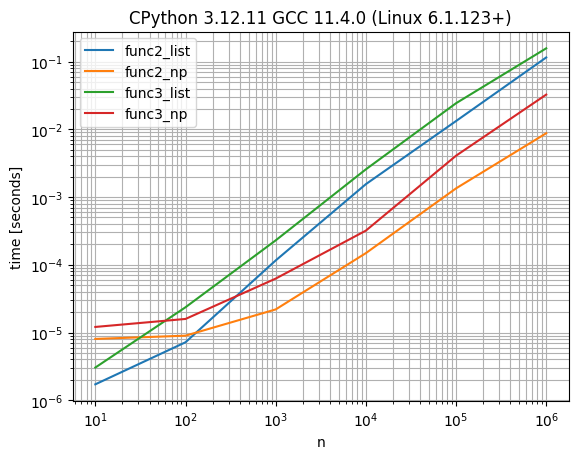

In [95]:
from simple_benchmark import benchmark

functions = [func2_list, func2_np, func3_list, func3_np]

aliases = {
    func2_list: "func2_list",
    func2_np: "func2_np",
    func3_list: "func3_list",
    func3_np: "func3_np"
}

arguments = {10**n: 10**n for n in range(1,7)}

b = benchmark(functions, arguments, "n", function_aliases=aliases)
b.plot()

Завдання 10. Висновки

UsageError: Line magic function `%%time` not found.
